Deutsch's Algorithm Circuit:


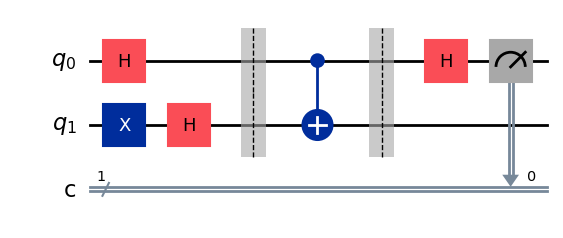


Results (0 = Constant, 1 = Balanced):
{'1': 1000}


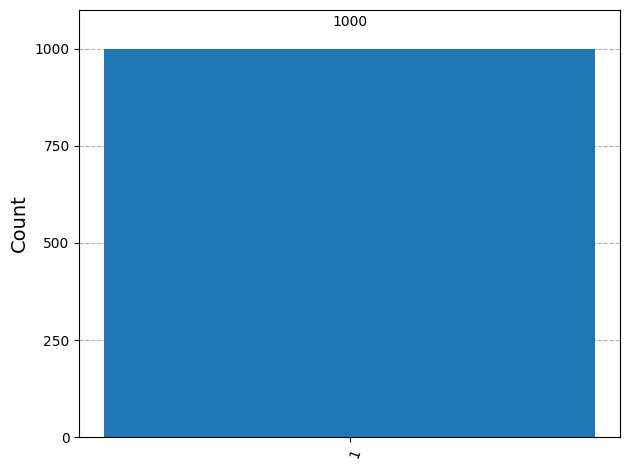

In [1]:
# --- Day 9: Deutsch's Algorithm ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Define the Oracle (The Black Box)
# We need to pick one: Constant or Balanced.
# Let's pick BALANCED (CNOT behavior).
def balanced_oracle(qc):
    qc.cx(0, 1) # This flips target if input is 1
    
# (Alternative: If you wanted a Constant oracle, you'd just do nothing or apply X to q1)

# 2. Build the Algorithm Circuit
qc = QuantumCircuit(2, 1) # 2 Qubits, 1 Classical bit

# A. Prepare the states
# Input (q0): Start in |+>
qc.h(0)

# Output (q1): Start in |-> (This is crucial for Phase Kickback!)
qc.x(1)
qc.h(1)

qc.barrier()

# B. Query the Oracle (Only ONCE)
balanced_oracle(qc)

qc.barrier()

# C. Interference (The Solution)
qc.h(0) # This brings q0 out of superposition

# D. Measure only the Input Qubit
qc.measure(0, 0)

# 3. Draw the Circuit
print("Deutsch's Algorithm Circuit:")
display(qc.draw(output='mpl'))

# 4. Run Simulation
sim = AerSimulator()
result = sim.run(qc, shots=1000).result()
counts = result.get_counts()

# 5. Analyze
print("\nResults (0 = Constant, 1 = Balanced):")
print(counts)
display(plot_histogram(counts))